Opening raw data file ../data/pilot_data/sub-01_ses-001_raw_preprocessed_LandoitC_noEpoched.fif...


C:\Users\s\AppData\Local\Temp\ipykernel_37492\317869155.py:39: RuntimeWarning: This filename (../data/pilot_data/sub-01_ses-001_raw_preprocessed_LandoitC_noEpoched.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(data_path, preload=True)


    Range : 637484 ... 880217 =   2124.947 ...  2934.057 secs
Ready.
Reading 0 ... 242733  =      0.000 ...   809.110 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 9901 samples (33.003 s)

275 events found on stim channel Trigger
Event IDs: [  1   2   3   4   7   8   9  10  11  13  14  15  16  17  18  21  22  23
  24  25  26  27  28  30  31  32  34  37  38  39  40  41  44  45  46  47
  48  50  51  52  54  64 128]
Unique event codes before recoding: [  1   2   3   4   7   8   9  10  11  13  14  

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


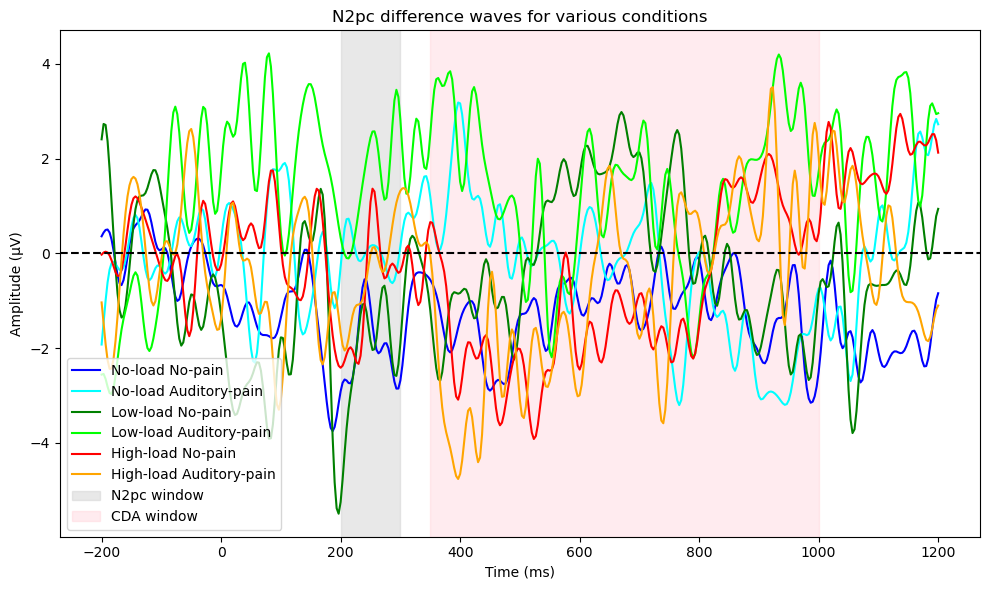

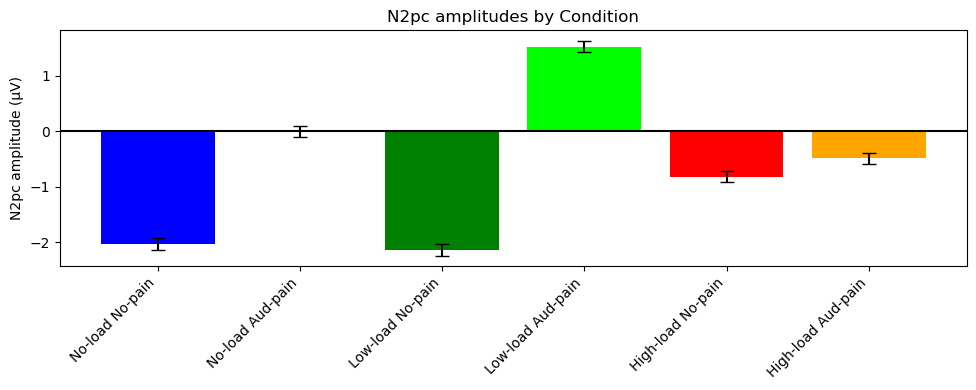

In [ ]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------
# User adjustments
data_path = "../data/pilot_data/sub-01_ses-001_raw_preprocessed_LandoitC_noEpoched.fif"

# N2pc time window
N2pc_start, N2pc_end = 0.2, 0.3  # 200–300 ms
CDA_start, CDA_end = 0.35, 1.0   

right_hemi = ['P3','T5','O1']
left_hemi = ['P4','T6','O2']

# Conditions and triggers 
no_load_no_pain_triggers = [17]
no_load_auditory_pain_triggers = [34]

low_load_no_pain_triggers = [2,4,6,8,19,21,23,25]
low_load_auditory_pain_triggers = [36,38,40,42]

high_load_no_pain_triggers = [10,12,14,16,27,29,31,33]
high_load_auditory_pain_triggers = [44,46,48,50]

# Assign event IDs
# Each condition gets its own code:
event_map = {
    'no_load_no_pain': 110,
    'no_load_auditory_pain': 120,
    'low_load_no_pain': 210,
    'low_load_auditory_pain': 220,
    'high_load_no_pain': 310,
    'high_load_auditory_pain': 320
}

# -----------------------------------------------------
# Load raw data
raw = mne.io.read_raw_fif(data_path, preload=True)

# Filter if needed
raw.filter(0.1, 30.0)

# Find events
events = mne.find_events(raw)
print("Unique event codes before recoding:", np.unique(events[:,2]))

# Recode events
for i in range(len(events)):
    trig = events[i,2]
    if trig in no_load_no_pain_triggers:
        events[i,2] = 110
    elif trig in no_load_auditory_pain_triggers:
        events[i,2] = 120
    elif trig in low_load_no_pain_triggers:
        events[i,2] = 210
    elif trig in low_load_auditory_pain_triggers:
        events[i,2] = 220
    elif trig in high_load_no_pain_triggers:
        events[i,2] = 310
    elif trig in high_load_auditory_pain_triggers:
        events[i,2] = 320

# Now define event_id from event_map keys/values:
event_id = {
    'no_load_no_pain': 110,
    'no_load_auditory_pain': 120,
    'low_load_no_pain': 210,
    'low_load_auditory_pain': 220,
    'high_load_no_pain': 310,
    'high_load_auditory_pain': 320
}

# Create epochs
tmin, tmax = -0.2, 1.2  
epochs = mne.Epochs(
    raw, events, event_id=event_id,
    tmin=tmin, tmax=tmax,
    baseline=(None,0),
    preload=True
)

# Get Evokeds for each condition
evoked_no_load_no_pain = epochs['no_load_no_pain'].average()
evoked_no_load_aud_pain = epochs['no_load_auditory_pain'].average()

evoked_low_load_no_pain = epochs['low_load_no_pain'].average()
evoked_low_load_aud_pain = epochs['low_load_auditory_pain'].average()

evoked_high_load_no_pain = epochs['high_load_no_pain'].average()
evoked_high_load_aud_pain = epochs['high_load_auditory_pain'].average()

# Compute difference waves for N2pc:
def compute_diff(evoked):
    contra = evoked.copy().pick_channels(right_hemi).data.mean(axis=0)
    ipsi = evoked.copy().pick_channels(left_hemi).data.mean(axis=0)
    return contra - ipsi

diff_no_load_no_pain = compute_diff(evoked_no_load_no_pain)
diff_no_load_aud_pain = compute_diff(evoked_no_load_aud_pain)
diff_low_load_no_pain = compute_diff(evoked_low_load_no_pain)
diff_low_load_aud_pain = compute_diff(evoked_low_load_aud_pain)
diff_high_load_no_pain = compute_diff(evoked_high_load_no_pain)
diff_high_load_aud_pain = compute_diff(evoked_high_load_aud_pain)

times = evoked_no_load_no_pain.times

def mean_amplitude(data, times, start, end):
    mask = (times >= start) & (times <= end)
    return data[mask].mean()

# Compute N2pc amplitudes
N2pc_no_load_no_pain = mean_amplitude(diff_no_load_no_pain, times, N2pc_start, N2pc_end)
N2pc_no_load_aud_pain = mean_amplitude(diff_no_load_aud_pain, times, N2pc_start, N2pc_end)

N2pc_low_load_no_pain = mean_amplitude(diff_low_load_no_pain, times, N2pc_start, N2pc_end)
N2pc_low_load_aud_pain = mean_amplitude(diff_low_load_aud_pain, times, N2pc_start, N2pc_end)

N2pc_high_load_no_pain = mean_amplitude(diff_high_load_no_pain, times, N2pc_start, N2pc_end)
N2pc_high_load_aud_pain = mean_amplitude(diff_high_load_aud_pain, times, N2pc_start, N2pc_end)

# Dummy SEM values if you have multiple participants:
SEM = 0.1

# Plot difference waves
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(times*1000, diff_no_load_no_pain*1e6, label='No-load No-pain', color='blue')
ax.plot(times*1000, diff_no_load_aud_pain*1e6, label='No-load Auditory-pain', color='cyan')
ax.plot(times*1000, diff_low_load_no_pain*1e6, label='Low-load No-pain', color='green')
ax.plot(times*1000, diff_low_load_aud_pain*1e6, label='Low-load Auditory-pain', color='lime')
ax.plot(times*1000, diff_high_load_no_pain*1e6, label='High-load No-pain', color='red')
ax.plot(times*1000, diff_high_load_aud_pain*1e6, label='High-load Auditory-pain', color='orange')

# Shade N2pc and CDA intervals
ax.axvspan(N2pc_start*1000, N2pc_end*1000, color='lightgray', alpha=0.5, label='N2pc window')
ax.axvspan(CDA_start*1000, CDA_end*1000, color='pink', alpha=0.3, label='CDA window')

ax.axhline(0, color='k', linestyle='--')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Amplitude (µV)')
ax.set_title('N2pc difference waves for various conditions')
ax.legend()
plt.tight_layout()
plt.show()

# Create bar plot for N2pc amplitudes
conditions = [
    'No-load No-pain', 'No-load Aud-pain',
    'Low-load No-pain', 'Low-load Aud-pain',
    'High-load No-pain', 'High-load Aud-pain'
]
N2pc_means = [
    N2pc_no_load_no_pain*1e6, N2pc_no_load_aud_pain*1e6,
    N2pc_low_load_no_pain*1e6, N2pc_low_load_aud_pain*1e6,
    N2pc_high_load_no_pain*1e6, N2pc_high_load_aud_pain*1e6
]
N2pc_sems = [SEM]*6

x = np.arange(len(conditions))
fig, ax = plt.subplots(figsize=(10,4))
bars = ax.bar(x, N2pc_means, yerr=N2pc_sems, capsize=5,
              color=['blue','cyan','green','lime','red','orange'])

ax.set_xticks(x)
ax.set_xticklabels(conditions, rotation=45, ha='right')
ax.set_ylabel('N2pc amplitude (µV)')
ax.set_title('N2pc amplitudes by Condition')
ax.axhline(0, color='k')

plt.tight_layout()
plt.show()


Opening raw data file ../data/pilot_data/sub-01_ses-001_raw_preprocessed_LandoitC_noEpoched.fif...
    Range : 637484 ... 880217 =   2124.947 ...  2934.057 secs
Ready.
Reading 0 ... 242733  =      0.000 ...   809.110 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 9901 samples (33.003 s)



C:\Users\s\AppData\Local\Temp\ipykernel_37492\1984883287.py:38: RuntimeWarning: This filename (../data/pilot_data/sub-01_ses-001_raw_preprocessed_LandoitC_noEpoched.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(data_path, preload=True)


275 events found on stim channel Trigger
Event IDs: [  1   2   3   4   7   8   9  10  11  13  14  15  16  17  18  21  22  23
  24  25  26  27  28  30  31  32  34  37  38  39  40  41  44  45  46  47
  48  50  51  52  54  64 128]
Unique event codes before recoding: [  1   2   3   4   7   8   9  10  11  13  14  15  16  17  18  21  22  23
  24  25  26  27  28  30  31  32  34  37  38  39  40  41  44  45  46  47
  48  50  51  52  54  64 128]
Not setting metadata
60 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 60 events and 241 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should us

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


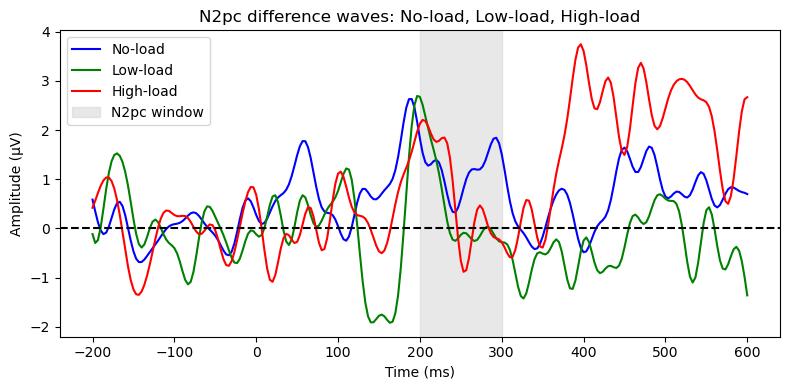

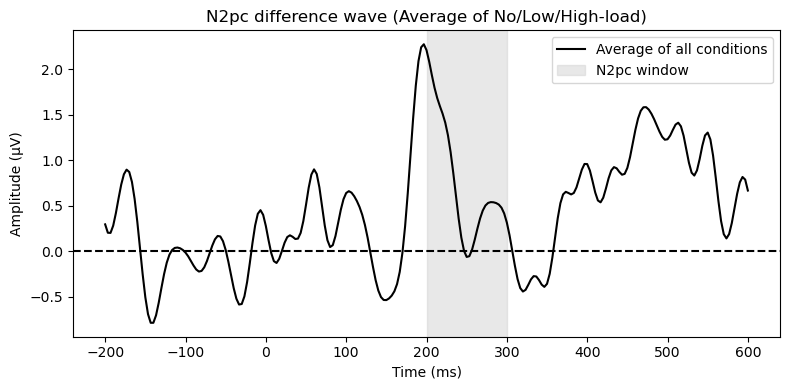

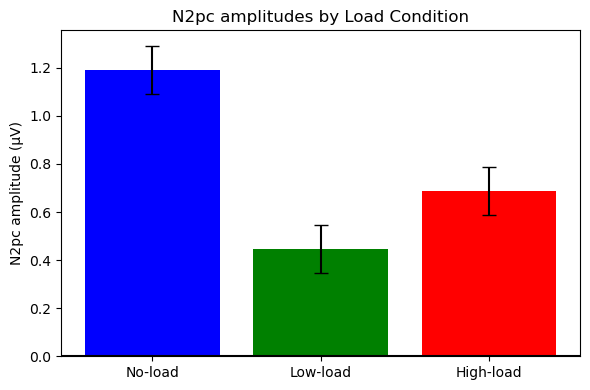

In [ ]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------
# User adjustments
data_path = "../data/pilot_data/sub-01_ses-001_raw_preprocessed_LandoitC_noEpoched.fif"

# N2pc time window
N2pc_start, N2pc_end = 0.2, 0.3  # 200–300 ms

# Electrode sets (assuming a known lateralization approach)
left_hemi = ['P3','T5','O1']
right_hemi = ['P4','T6','O2']


no_load_no_pain_triggers = [17]
no_load_auditory_pain_triggers = [34]
low_load_no_pain_triggers = [2,4,6,8,19,21,23,25]
low_load_auditory_pain_triggers = [36,38,40,42]
high_load_no_pain_triggers = [10,12,14,16,27,29,31,33]
high_load_auditory_pain_triggers = [44,46,48,50]

# Merge triggers:
no_load_triggers = no_load_no_pain_triggers + no_load_auditory_pain_triggers # [17,34]
low_load_triggers = low_load_no_pain_triggers + low_load_auditory_pain_triggers # [2,4,6,8,19,21,23,25,36,38,40,42]
high_load_triggers = high_load_no_pain_triggers + high_load_auditory_pain_triggers # [10,12,14,16,27,29,31,33,44,46,48,50]

# Map each load condition to a single integer code
event_id = {
    'no_load': 100,
    'low_load': 200,
    'high_load': 300
}

# -----------------------------------------------------
# Load raw data
raw = mne.io.read_raw_fif(data_path, preload=True)

# Filter if needed
raw.filter(0.1, 30.0)

# Find events
events = mne.find_events(raw)
print("Unique event codes before recoding:", np.unique(events[:,2]))

# Recode events
for i in range(len(events)):
    trig = events[i,2]
    if trig in no_load_triggers:
        events[i,2] = 100
    elif trig in low_load_triggers:
        events[i,2] = 200
    elif trig in high_load_triggers:
        events[i,2] = 300

# Create epochs
tmin, tmax = -0.2, 0.6
epochs = mne.Epochs(
    raw, events, event_id=event_id,
    tmin=tmin, tmax=tmax,
    baseline=(None,0),
    preload=True
)

# Average each condition
evoked_no = epochs['no_load'].average()
evoked_low = epochs['low_load'].average()
evoked_high = epochs['high_load'].average()

# Compute difference waves for N2pc:
def compute_diff(evoked):
    contra = evoked.copy().pick_channels(right_hemi).data.mean(axis=0)
    ipsi = evoked.copy().pick_channels(left_hemi).data.mean(axis=0)
    return contra - ipsi

diff_no = compute_diff(evoked_no)
diff_low = compute_diff(evoked_low)
diff_high = compute_diff(evoked_high)

times = evoked_no.times

def mean_amplitude(data, times, start, end):
    mask = (times >= start) & (times <= end)
    return data[mask].mean()

# Compute N2pc amplitudes
N2pc_no = mean_amplitude(diff_no, times, N2pc_start, N2pc_end)
N2pc_low = mean_amplitude(diff_low, times, N2pc_start, N2pc_end)
N2pc_high = mean_amplitude(diff_high, times, N2pc_start, N2pc_end)

# Dummy SEM values if multiple participants
N2pc_no_sem = 0.1
N2pc_low_sem = 0.1
N2pc_high_sem = 0.1

# -----------------------------------------------------
# Plot the difference waves
fig, ax = plt.subplots(figsize=(8,4))

ax.plot(times*1000, diff_no*1e6, color='blue', label='No-load')
ax.plot(times*1000, diff_low*1e6, color='green', label='Low-load')
ax.plot(times*1000, diff_high*1e6, color='red', label='High-load')

ax.axvspan(N2pc_start*1000, N2pc_end*1000, color='lightgray', alpha=0.5, label='N2pc window')
ax.axhline(0, color='k', linestyle='--')

ax.set_xlabel('Time (ms)')
ax.set_ylabel('Amplitude (µV)')
ax.set_title('N2pc difference waves: No-load, Low-load, High-load')
ax.legend()
plt.tight_layout()
plt.show()

# -----------------------------------------------------
# Compute average difference wave across all three conditions
diff_mean = (diff_no + diff_low + diff_high) / 3.0

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(times*1000, diff_mean*1e6, color='black', label='Average of all conditions')
ax.axvspan(N2pc_start*1000, N2pc_end*1000, color='lightgray', alpha=0.5, label='N2pc window')
ax.axhline(0, color='k', linestyle='--')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Amplitude (µV)')
ax.set_title('N2pc difference wave (Average of No/Low/High-load)')
ax.legend()
plt.tight_layout()
plt.show()

# -----------------------------------------------------
# Bar plot of N2pc amplitudes
conditions = ['No-load', 'Low-load', 'High-load']
N2pc_means = [N2pc_no*1e6, N2pc_low*1e6, N2pc_high*1e6]  # convert to µV
N2pc_sems = [N2pc_no_sem, N2pc_low_sem, N2pc_high_sem]

x = np.arange(len(conditions))
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(x, N2pc_means, yerr=N2pc_sems, capsize=5,
       color=['blue','green','red'])
ax.set_xticks(x)
ax.set_xticklabels(conditions)
ax.set_ylabel('N2pc amplitude (µV)')
ax.set_title('N2pc amplitudes by Load Condition')
ax.axhline(0, color='k')
plt.tight_layout()
plt.show()


Opening raw data file ../data/pilot_data/sub-01_ses-001_raw_preprocessed_LandoitC_noEpoched.fif...
    Range : 637484 ... 880217 =   2124.947 ...  2934.057 secs
Ready.
Reading 0 ... 242733  =      0.000 ...   809.110 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 9901 samples (33.003 s)



C:\Users\s\AppData\Local\Temp\ipykernel_25376\2745317659.py:9: RuntimeWarning: This filename (../data/pilot_data/sub-01_ses-001_raw_preprocessed_LandoitC_noEpoched.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(data_path, preload=True)


275 events found on stim channel Trigger
Event IDs: [  1   2   3   4   7   8   9  10  11  13  14  15  16  17  18  21  22  23
  24  25  26  27  28  30  31  32  34  37  38  39  40  41  44  45  46  47
  48  50  51  52  54  64 128]
Unique event codes: [  1   2   3   4   7   8   9  10  11  13  14  15  16  17  18  21  22  23
  24  25  26  27  28  30  31  32  34  37  38  39  40  41  44  45  46  47
  48  50  51  52  54  64 128]
Not setting metadata
60 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 60 events and 361 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...)

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


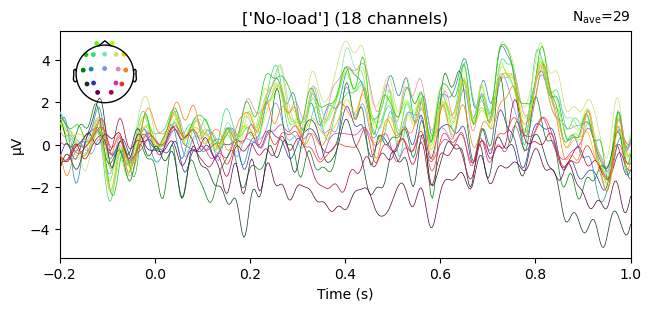

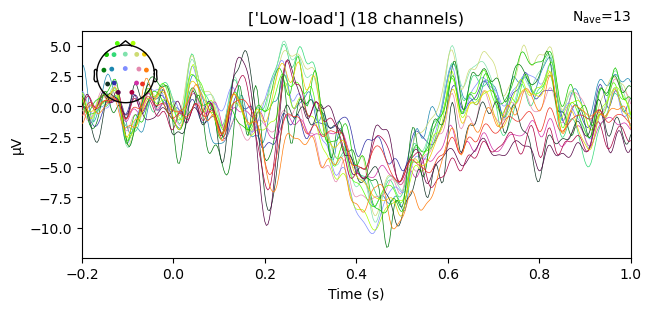

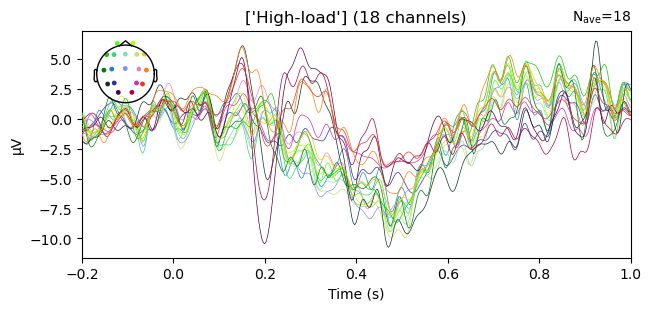

CDA no-load (µV): 0.6719857104803146
CDA low-load (µV): -0.7444807540212537
CDA high-load (µV): 1.7766030516647384


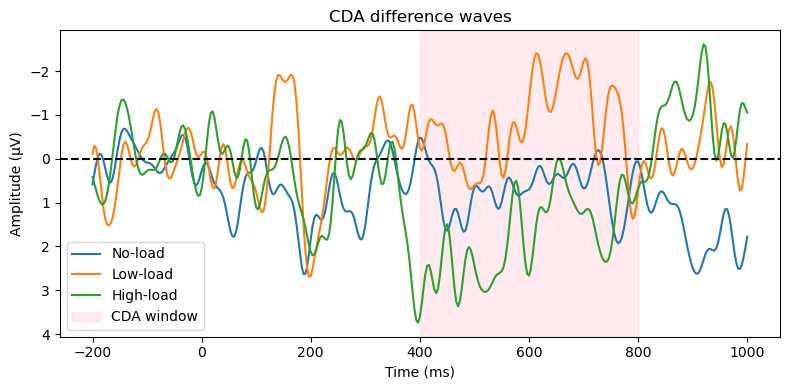

   Condition   mean_RT  mean_Acc
0  high_load  2.758889  0.888889
1   low_load  2.465641  1.000000
2    no_load  3.592299  0.000000


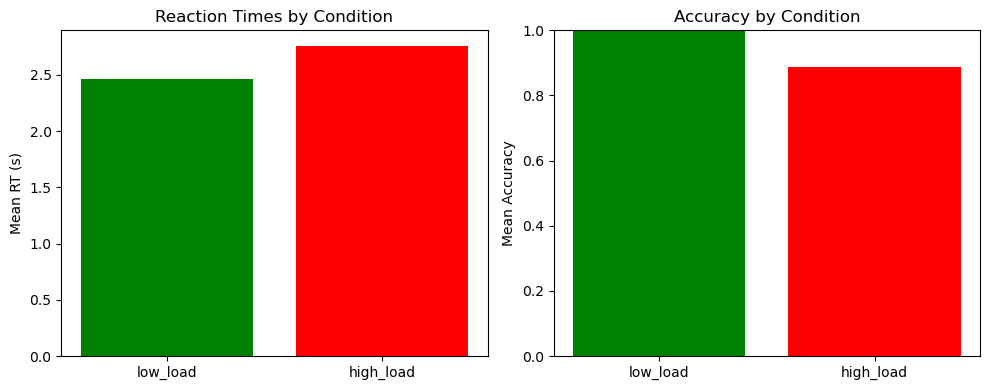

In [5]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------------------------------
# Load preprocessed raw data
data_path = "../data/pilot_data/sub-01_ses-001_raw_preprocessed_LandoitC_noEpoched.fif"
raw = mne.io.read_raw_fif(data_path, preload=True)

# Filter if needed
raw.filter(0.1, 30.0)

# Find events
events = mne.find_events(raw)

print("Unique event codes:", np.unique(events[:,2]))

# -----------------------------------------------------
# Defining condition triggers (example):
# Use your known triggers for no load, low load, high load memory conditions:
no_load_triggers = [17,34]  # Fill with correct triggers
low_load_triggers = [2,4,6,8,19,21,23,25,36,38,40,42]
high_load_triggers = [10,12,14,16,27,29,31,33,44,46,48,50]

# Response triggers:
correct_trigger = 51
incorrect_trigger = 52
no_load_condition_trigger = 53  # Not a response, this is no load condition token
no_response_trigger = 54


# We'll recode events into event_id for memory epochs (memory array onset)
# Suppose memory array onset triggers are from 1–50 range as given before:
event_id = {
    'no_load': 100,
    'low_load': 200,
    'high_load': 300
}

# Recode your memory array onset events into these codes:
for i in range(len(events)):
    trig = events[i,2]
    if trig in no_load_triggers:
        events[i,2] = 100
    elif trig in low_load_triggers:
        events[i,2] = 200
    elif trig in high_load_triggers:
        events[i,2] = 300
    # Otherwise leave them as is, especially if they are responses (51,52,54) or others.

# Now we have events with memory array onset coded as 100/200/300 for no/low/high load.

# Epoching for CDA: from -200 to 1000 ms relative to memory array onset
tmin, tmax = -0.2, 1.0
epochs = mne.Epochs(
    raw, events, event_id=event_id,
    tmin=tmin, tmax=tmax,
    baseline=(None,0),
    preload=True
)

evoked_no = epochs['no_load'].average()
evoked_low = epochs['low_load'].average()
evoked_high = epochs['high_load'].average()

times = evoked_no.times

# Compute CDA:
# CDA is computed similarly to N2pc, but in a later time window, and referencing memory array.
# Contralateral-minus-ipsilateral electrodes: same sets as before.
left_hemi = ['P3','T5','O1'] 
right_hemi = ['P4','T6','O2']


def compute_diff(evoked, target_side='left'):
    # If target_side known per epoch, separate them; here assume known or balanced
    # For CDA, you can follow the same logic as N2pc.
    # Let's assume conditions are balanced and use a method similar to N2pc:
    contra = evoked.copy().pick_channels(right_hemi).data.mean(axis=0)
    ipsi = evoked.copy().pick_channels(left_hemi).data.mean(axis=0)
    # If target is on left: contra should be right - left
    # If on right: contra should be left - right
    # If mixed, you must do more complex splitting.
    # For simplicity assume left-target trials:
    return contra - ipsi

diff_no = compute_diff(evoked_no)
diff_low = compute_diff(evoked_low)
diff_high = compute_diff(evoked_high)
evoked_no.plot(titles=['No-load'])
evoked_low.plot(titles=['Low-load'])
evoked_high.plot(titles=['High-load'])

# CDA amplitude from 400–800 ms:
CDA_start, CDA_end = 0.4, 0.8
def mean_amplitude(data, times, start, end):
    mask = (times >= start) & (times <= end)
    return data[mask].mean()

CDA_no = mean_amplitude(diff_no, times, CDA_start, CDA_end)
CDA_low = mean_amplitude(diff_low, times, CDA_start, CDA_end)
CDA_high = mean_amplitude(diff_high, times, CDA_start, CDA_end)

print("CDA no-load (µV):", CDA_no*1e6)
print("CDA low-load (µV):", CDA_low*1e6)
print("CDA high-load (µV):", CDA_high*1e6)

# Plot CDA difference waves
plt.figure(figsize=(8,4))
plt.gca().invert_yaxis()
plt.plot(times*1000, diff_no*1e6, label='No-load')
plt.plot(times*1000, diff_low*1e6, label='Low-load')
plt.plot(times*1000, diff_high*1e6, label='High-load')
plt.axvspan(CDA_start*1000, CDA_end*1000, color='pink', alpha=0.3, label='CDA window')
plt.axhline(0, color='k', linestyle='--')
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude (µV)")
plt.title("CDA difference waves")
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------------------------------
# Performance Analysis (Response Times and Accuracy)
# Assuming the response triggers occur after the search array event.
# If search array onset triggers are known (e.g., from previous steps),
# you must find pairs of events: memory array onset -> search array -> response (51 or 52 or 54).

# For simplicity, assume response triggers appear after memory array or search array:
# We will look at events after memory conditions and find the next response event.
# Example approach:
conditions = {100:'no_load', 200:'low_load', 300:'high_load'}

data_list = []
event_codes = events[:,2]
event_times = events[:,0] / raw.info['sfreq']

for i, trig in enumerate(event_codes):
    if trig in conditions:
        cond = conditions[trig]
        # Find next response event (51 correct, 52 incorrect, 54 no response)
        # We'll search forward for a response trigger
        rt = np.nan
        accuracy = np.nan
        for j in range(i+1, len(event_codes)):
            resp_trig = event_codes[j]
            if resp_trig in [51,52,54]:
                resp_time = event_times[j]
                onset_time = event_times[i]
                rt = resp_time - onset_time  # RT in seconds
                if resp_trig == 51:
                    accuracy = 1
                elif resp_trig == 52:
                    accuracy = 0
                elif resp_trig == 54:
                    accuracy = 0  # no response considered incorrect
                break
        data_list.append([cond, rt, accuracy])

perf_df = pd.DataFrame(data_list, columns=['Condition', 'RT', 'Accuracy'])

# Compute mean RT and Accuracy per condition
perf_summary = perf_df.groupby('Condition').agg(
    mean_RT=('RT','mean'),
    mean_Acc=('Accuracy','mean')
).reset_index()

print(perf_summary)

# Plot performance bar plots
conditions_order = ['low_load','high_load']
mean_RT = [perf_summary.loc[perf_summary.Condition==c,'mean_RT'].values[0] for c in conditions_order]
mean_Acc = [perf_summary.loc[perf_summary.Condition==c,'mean_Acc'].values[0] for c in conditions_order]

fig, ax = plt.subplots(1,2,figsize=(10,4))

# RT bar plot
ax[0].bar(conditions_order, mean_RT, color=['green','red'])
ax[0].set_ylabel("Mean RT (s)")
ax[0].set_title("Reaction Times by Condition")

# Accuracy bar plot
ax[1].bar(conditions_order, mean_Acc, color=['green','red'])
ax[1].set_ylabel("Mean Accuracy")
ax[1].set_ylim([0,1])
ax[1].set_title("Accuracy by Condition")
plt.tight_layout()
plt.show()


Opening raw data file ../data/pilot_data/sub-01_ses-001_raw_preprocessed_LandoitC_noEpoched.fif...
    Range : 637484 ... 880217 =   2124.947 ...  2934.057 secs
Ready.
Reading 0 ... 242733  =      0.000 ...   809.110 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 9901 samples (33.003 s)



C:\Users\s\AppData\Local\Temp\ipykernel_17324\4052400448.py:10: RuntimeWarning: This filename (../data/pilot_data/sub-01_ses-001_raw_preprocessed_LandoitC_noEpoched.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(data_path, preload=True)


275 events found on stim channel Trigger
Event IDs: [  1   2   3   4   7   8   9  10  11  13  14  15  16  17  18  21  22  23
  24  25  26  27  28  30  31  32  34  37  38  39  40  41  44  45  46  47
  48  50  51  52  54  64 128]
Unique event codes: [  1   2   3   4   7   8   9  10  11  13  14  15  16  17  18  21  22  23
  24  25  26  27  28  30  31  32  34  37  38  39  40  41  44  45  46  47
  48  50  51  52  54  64 128]
Not setting metadata
60 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 60 events and 361 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...)

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


CDA no-load (µV): -0.2878088185453879
CDA low-load (µV): -0.2929078726170837
CDA high-load (µV): 1.1741251606451848


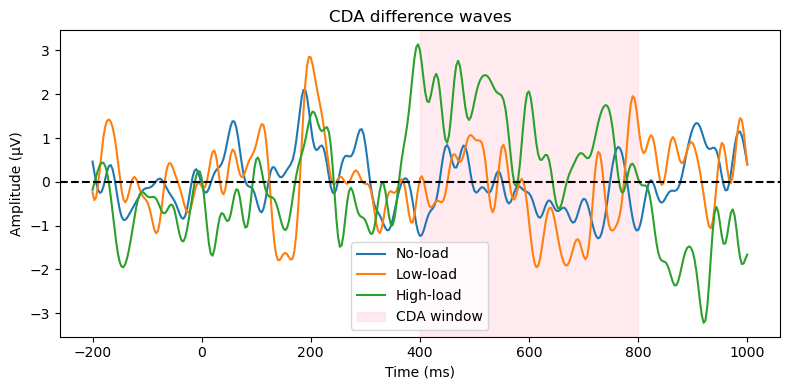

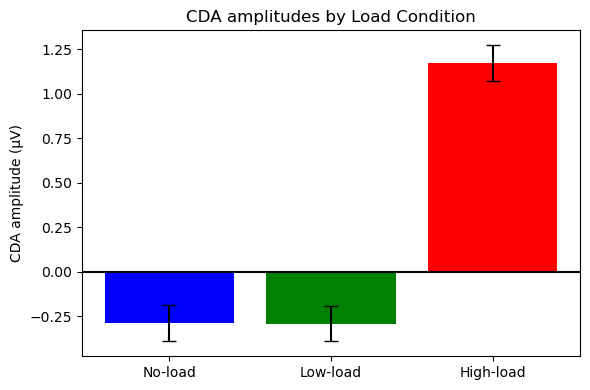

[2216.39       2216.81333333 2219.99       2224.36333333 2227.23666667
 2232.21666667 2232.53666667 2235.80666667 2239.25       2239.57
 2242.84       2249.06333333 2249.68       2252.65333333 2257.25666667
 2257.67333333 2260.84666667 2264.19333333 2264.81       2266.55
 2271.17333333 2271.69333333 2274.42333333 2278.92333333 2279.24
 2282.51333333 2286.86       2287.18666667 2290.45666667 2295.22
 2295.54       2297.95666667 2303.29       2303.60666667 2306.88
 2312.51       2313.03333333 2315.19333333 2318.57333333 2319.19
 2322.16333333 2325.56       2326.08       2328.37333333 2331.79333333
 2332.21666667 2334.99666667 2338.43333333 2338.85       2340.83666667
 2343.73       2344.14666667 2346.34333333 2349.15333333 2349.77333333
 2352.13666667 2354.94       2355.26       2358.19666667 2360.99333333
 2363.7        2366.48666667 2370.07333333 2372.91666667 2373.53666667
 2376.51       2381.87666667 2382.39666667 2385.46666667 2388.37666667
 2390.85666667 2393.62666667 2393.94333333

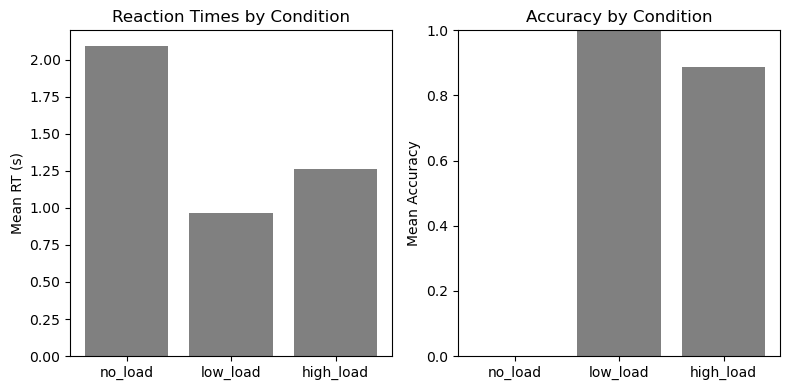

In [ ]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import detrend

# -----------------------------------------------------
# Load preprocessed raw data
data_path = "../data/pilot_data/sub-01_ses-001_raw_preprocessed_LandoitC_noEpoched.fif"
raw = mne.io.read_raw_fif(data_path, preload=True)

# Filter if needed
raw.filter(0.1, 30.0)

# Find events
events = mne.find_events(raw)
print("Unique event codes:", np.unique(events[:,2]))

# -----------------------------------------------------
# Triggers from previous definitions (merging no-pain and auditory-pain):
# No-load condition triggers:
no_load_triggers = [17,34]

# Low-load condition triggers:
low_load_triggers = [2,4,6,8,19,21,23,25,36,38,40,42]

# High-load condition triggers:
high_load_triggers = [10,12,14,16,27,29,31,33,44,46,48,50]

# Response triggers (for performance, optional):
correct_trigger = 51
incorrect_trigger = 52
no_load_condition_trigger = 53
no_response_trigger = 54

# Map memory conditions to single codes:
event_id = {
    'no_load': 100,
    'low_load': 200,
    'high_load': 300
}

# Recode events:
for i in range(len(events)):
    trig = events[i,2]
    if trig in no_load_triggers:
        events[i,2] = 100
    elif trig in low_load_triggers:
        events[i,2] = 200
    elif trig in high_load_triggers:
        events[i,2] = 300
    # Else leave responses or unrelated triggers as-is.

# Epoch for CDA: from -200 to 1000 ms around memory array onset
tmin, tmax = -0.2, 1.0
epochs = mne.Epochs(
    raw, events, event_id=event_id,
    tmin=tmin, tmax=tmax,
    baseline=(None,0),
    preload=True
)

evoked_no = epochs['no_load'].average()
evoked_low = epochs['low_load'].average()
evoked_high = epochs['high_load'].average()

times = evoked_no.times

# Electrode sets for lateralization (from previous instructions)
right_hemi = ['P4','T6','O2']   # Typically right hemisphere electrodes are even numbers
left_hemi = ['P3','T5','O1'] # Typically left hemisphere electrodes are odd numbers

# According to the standard 10-20 system:
# O1, P3, T5 = left hemisphere
# O2, P4, T6 = right hemisphere
# If the target is on the left, contralateral = right hemisphere; ipsilateral = left hemisphere
# Here we previously set 'contra = right_hemi' and 'ipsi = left_hemi' assuming left-target trials.
# If you have mixed target sides, you must separate them first. For simplicity, assume balanced conditions.

def compute_cda_diff(evoked):
    # Contralateral - Ipsilateral for CDA
    # If we assume left-target configuration:
    contra = evoked.copy().pick_channels(left_hemi).data.mean(axis=0)   # If you want contralateral as left hemisphere for right targets, switch sets if needed
    ipsi = evoked.copy().pick_channels(right_hemi).data.mean(axis=0)
    # If your target side assumption differs, swap arrays above.
    # Check sign with your data. If you get positive amplitude, try swapping contra/ipsi order.

    # Try the opposite order if sign is reversed:
    # contra = evoked.copy().pick_channels(right_hemi).data.mean(axis=0)
    # ipsi = evoked.copy().pick_channels(left_hemi).data.mean(axis=0)
    # Return the combination that gives negative CDA as per literature
    return contra - ipsi

diff_no = compute_cda_diff(evoked_no)
diff_low = compute_cda_diff(evoked_low)
diff_high = compute_cda_diff(evoked_high)

# CDA amplitude from 400–800 ms:
CDA_start, CDA_end = 0.4, 0.8
def mean_amplitude(data, times, start, end):
    mask = (times >= start) & (times <= end)
    return data[mask].mean()

CDA_no = mean_amplitude(detrend(diff_no), times, CDA_start, CDA_end)
CDA_low = mean_amplitude(detrend(diff_low), times, CDA_start, CDA_end)
CDA_high = mean_amplitude(detrend(diff_high), times, CDA_start, CDA_end)

print("CDA no-load (µV):", CDA_no*1e6)
print("CDA low-load (µV):", CDA_low*1e6)
print("CDA high-load (µV):", CDA_high*1e6)

# Plot CDA difference waves
plt.figure(figsize=(8,4))
plt.plot(times*1000, detrend(diff_no)*1e6, label='No-load')
plt.plot(times*1000, detrend(diff_low)*1e6, label='Low-load')
plt.plot(times*1000, detrend(diff_high)*1e6, label='High-load')
plt.axvspan(CDA_start*1000, CDA_end*1000, color='pink', alpha=0.3, label='CDA window')
plt.axhline(0, color='k', linestyle='--')
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude (µV)")
plt.title("CDA difference waves")
plt.legend()
plt.tight_layout()
plt.show()


# Bar plot of CDA amplitudes
conditions = ['no_load', 'low_load', 'high_load']
CDA_means = [CDA_no*1e6, CDA_low*1e6, CDA_high*1e6]
# Dummy SEM if not available:
CDA_sem = [0.1, 0.1, 0.1]

x = np.arange(len(conditions))
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(x, CDA_means, yerr=CDA_sem, capsize=5, color=['blue','green','red'])
ax.set_xticks(x)
ax.set_xticklabels(['No-load', 'Low-load', 'High-load'])
ax.set_ylabel('CDA amplitude (µV)')
ax.set_title('CDA amplitudes by Load Condition')
ax.axhline(0, color='k')
plt.tight_layout()
plt.show()

# -----------------------------------------------------
# Optional: Performance Analysis (if needed)
# If you want to also re-run performance analysis with these conditions only:

conditions_map = {100:'no_load', 200:'low_load', 300:'high_load'}

data_list = []
event_codes = events[:,2]
event_times = events[:,0] / raw.info['sfreq']
print (event_times)
for i, trig in enumerate(event_codes):
    if trig in conditions_map:
        cond = conditions_map[trig]
        # Find next response event (51 correct, 52 incorrect, 54 no response)
        rt = np.nan
        accuracy = np.nan
        for j in range(i+1, len(event_codes)):
            resp_trig = event_codes[j]
            if resp_trig in [51,52,54]:
                resp_time = event_times[j]
                onset_time = event_times[i]
                rt = resp_time - onset_time -1.5 # RT in seconds
                if resp_trig == 51:
                    accuracy = 1
                else:
                    accuracy = 0
                break
        data_list.append([cond, rt, accuracy])

perf_df = pd.DataFrame(data_list, columns=['Condition', 'RT', 'Accuracy'])
perf_summary = perf_df.groupby('Condition').agg(mean_RT=('RT','mean'),
                                                mean_Acc=('Accuracy','mean')).reset_index()

print(perf_summary)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
for c in conditions:
    rt_val = perf_summary.loc[perf_summary.Condition == c, 'mean_RT'].values[0]
    plt.bar(c, rt_val, color='gray')
plt.ylabel("Mean RT (s)")
plt.title("Reaction Times by Condition")

plt.subplot(1,2,2)
for c in conditions:
    acc_val = perf_summary.loc[perf_summary.Condition == c, 'mean_Acc'].values[0]
    plt.bar(c, acc_val, color='gray')
plt.ylabel("Mean Accuracy")
plt.ylim([0,1])
plt.title("Accuracy by Condition")
plt.tight_layout()
plt.show()


Opening raw data file ../data/pilot_data/sub-01_ses-001_raw_preprocessed_LandoitC_noEpoched.fif...
    Range : 637484 ... 880217 =   2124.947 ...  2934.057 secs
Ready.
Reading 0 ... 242733  =      0.000 ...   809.110 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 9901 samples (33.003 s)



C:\Users\s\AppData\Local\Temp\ipykernel_8272\609436016.py:10: RuntimeWarning: This filename (../data/pilot_data/sub-01_ses-001_raw_preprocessed_LandoitC_noEpoched.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(data_path, preload=True)


275 events found on stim channel Trigger
Event IDs: [  1   2   3   4   7   8   9  10  11  13  14  15  16  17  18  21  22  23
  24  25  26  27  28  30  31  32  34  37  38  39  40  41  44  45  46  47
  48  50  51  52  54  64 128]
Unique event codes: [  1   2   3   4   7   8   9  10  11  13  14  15  16  17  18  21  22  23
  24  25  26  27  28  30  31  32  34  37  38  39  40  41  44  45  46  47
  48  50  51  52  54  64 128]
Not setting metadata
60 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 60 events and 361 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



Number of trials per condition after epoching:
no_load: 29 trials
low_load: 13 trials
high_load: 18 trials


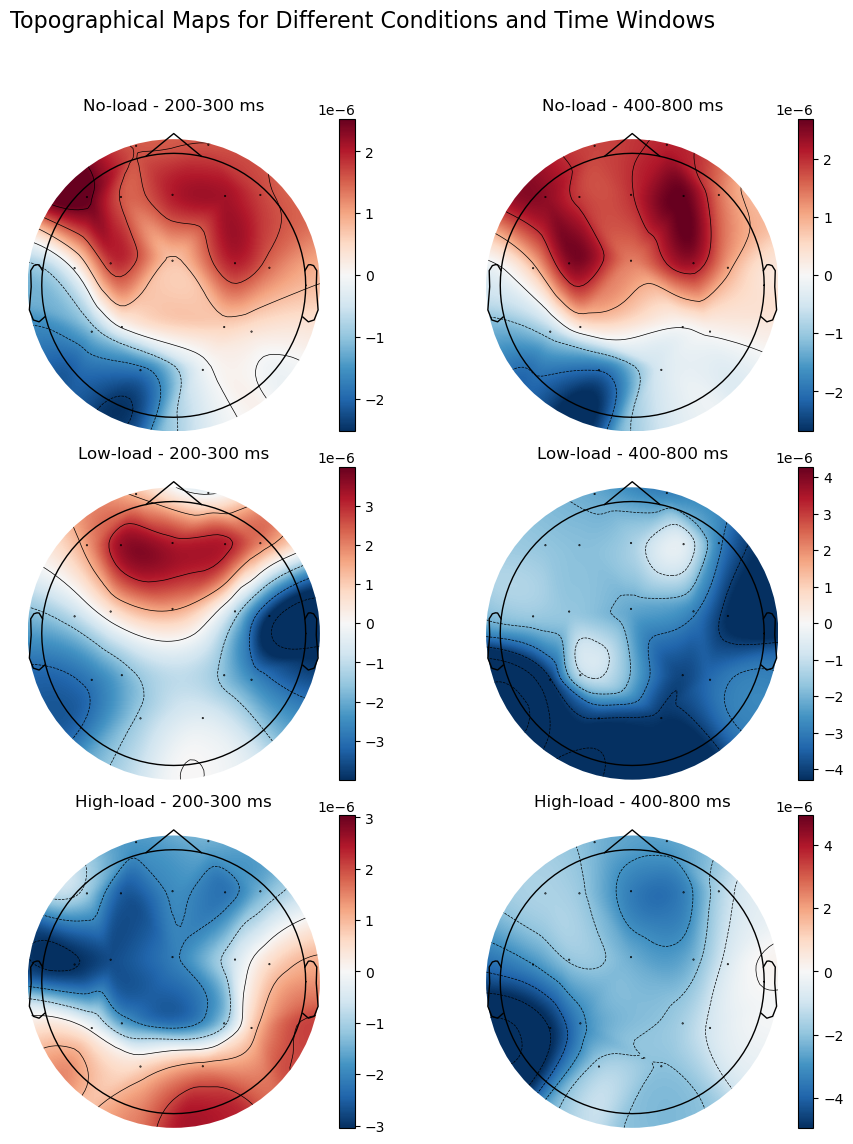

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


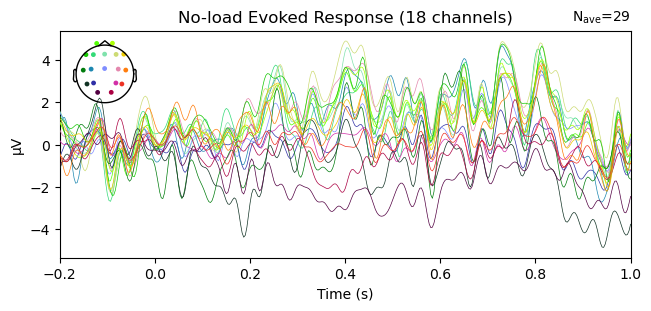

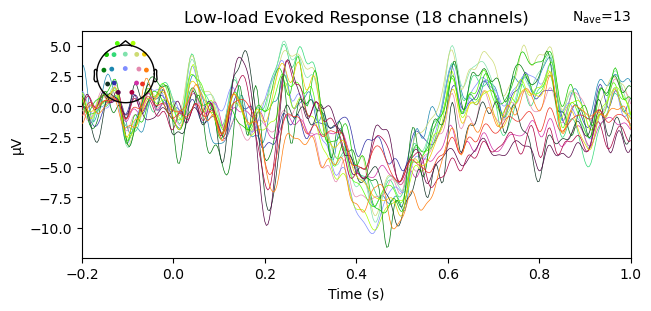

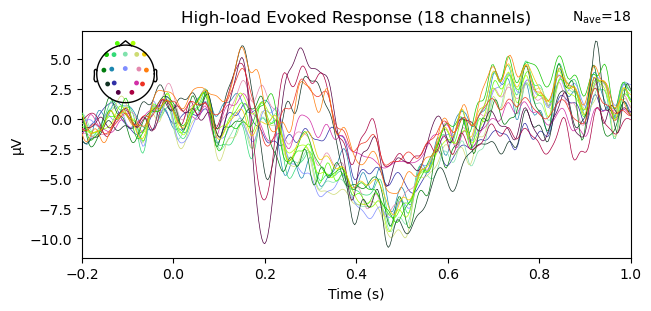

CDA Amplitudes (µV):
No-load: 0.67 µV
Low-load: -0.74 µV
High-load: 1.78 µV


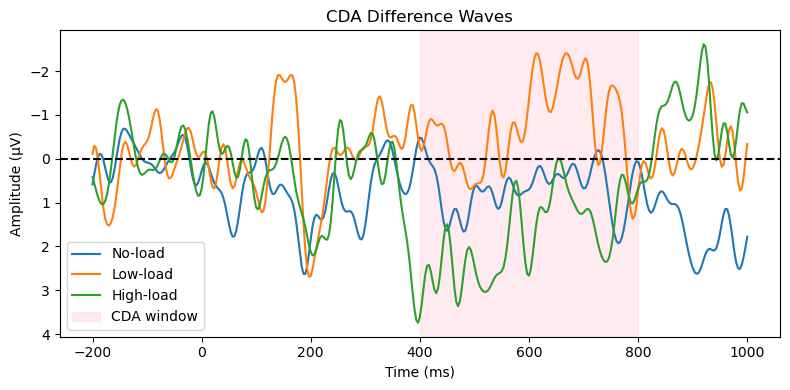


Number of clean trials per condition:
no_load: 29 trials
high_load: 18 trials
low_load: 13 trials

Performance Summary:
   Condition   mean_RT  mean_Acc  trial_count
0  high_load  2.758889  0.888889           18
1   low_load  2.465641  1.000000           13
2    no_load  3.592299  0.000000           29


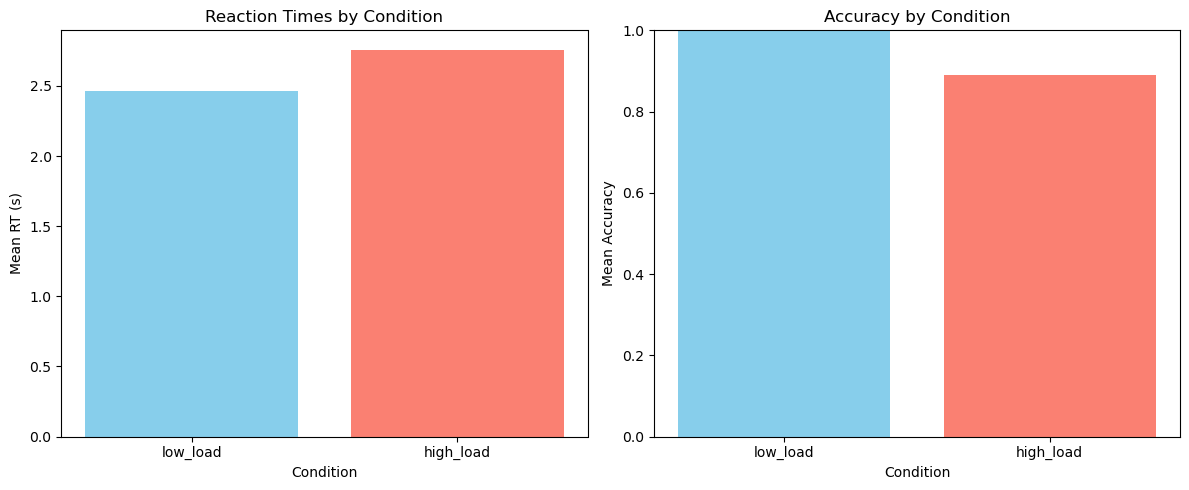

In [6]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mne.viz import plot_topomap

# -----------------------------------------------------
# Load preprocessed raw data
data_path = "../data/pilot_data/sub-01_ses-001_raw_preprocessed_LandoitC_noEpoched.fif"
raw = mne.io.read_raw_fif(data_path, preload=True)

# Filter the data if needed
raw.filter(0.1, 30.0)

# Find events
events = mne.find_events(raw)

print("Unique event codes:", np.unique(events[:, 2]))

# -----------------------------------------------------
# Defining condition triggers (example):
# Use your known triggers for no load, low load, high load memory conditions:
no_load_triggers = [17, 34]  
low_load_triggers = [2, 4, 6, 8, 19, 21, 23, 25, 36, 38, 40, 42]
high_load_triggers = [10, 12, 14, 16, 27, 29, 31, 33, 44, 46, 48, 50]

# Response triggers:
correct_trigger = 51
incorrect_trigger = 52
no_load_condition_trigger = 53  # Not a response, this is no load condition token
no_response_trigger = 54

# We'll recode events into event_id for memory epochs (memory array onset)
# Suppose memory array onset triggers are from 1–50 range as given before:
event_id = {
    'no_load': 100,
    'low_load': 200,
    'high_load': 300
}

# Recode your memory array onset events into these codes:
for i in range(len(events)):
    trig = events[i, 2]
    if trig in no_load_triggers:
        events[i, 2] = 100
    elif trig in low_load_triggers:
        events[i, 2] = 200
    elif trig in high_load_triggers:
        events[i, 2] = 300
    # Otherwise leave them as is, especially if they are responses (51,52,54) or others.

# Now we have events with memory array onset coded as 100/200/300 for no/low/high load.

# -----------------------------------------------------
# Epoching for CDA: from -200 to 1000 ms relative to memory array onset
tmin, tmax = -0.2, 1.0
epochs = mne.Epochs(
    raw, events, event_id=event_id,
    tmin=tmin, tmax=tmax,
    baseline=(None, 0),
    preload=True
)



# -----------------------------------------------------
# Display the number of trials per condition
print("\nNumber of trials per condition after epoching:")
for cond in event_id.keys():
    n_trials = len(epochs[cond])
    print(f"{cond}: {n_trials} trials")
# -----------------------------------------------------
# Averaging epochs for each condition
evoked_no = epochs['no_load'].average()
evoked_low = epochs['low_load'].average()
evoked_high = epochs['high_load'].average()

times = evoked_no.times

# -----------------------------------------------------
# Topoplots for specified time windows in a single figure with subplots
def plot_all_topoplots(evokeds, conditions, windows, fig_title="Topographical Maps"):
    """
    Plots all topographical maps for specified conditions and time windows in a single figure.

    Parameters:
    - evokeds: List of Evoked objects
    - conditions: List of condition names corresponding to evokeds
    - windows: List of tuples, each tuple is (start_time, end_time) in seconds
    - fig_title: String, title of the entire figure
    """
    n_conditions = len(evokeds)
    n_windows = len(windows)
    fig, axes = plt.subplots(n_conditions, n_windows, figsize=(5 * n_windows, 4 * n_conditions))
    fig.suptitle(fig_title, fontsize=16)

    # Ensure axes is 2D
    if n_conditions == 1 and n_windows == 1:
        axes = np.array([[axes]])
    elif n_conditions == 1 or n_windows == 1:
        axes = axes.reshape(n_conditions, n_windows)

    for i, (evoked, cond) in enumerate(zip(evokeds, conditions)):
        for j, window in enumerate(windows):
            start, end = window
            # Crop the evoked data to the time window
            evoked_window = evoked.copy().crop(tmin=start, tmax=end)
            # Average over the time window
            mean_data = evoked_window.data.mean(axis=1)
            # Select the appropriate axis
            ax = axes[i, j]
            # Plot topomap
            im, cm = plot_topomap(mean_data, evoked.info, axes=ax, show=False)
            # Set title
            ax.set_title(f"{cond} - {int(start*1000)}-{int(end*1000)} ms", fontsize=12)
            # Add colorbar to the right of each subplot
            # Positioning colorbar relative to the subplot
            fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the suptitle
    plt.show()

# Define the time windows (in seconds)
topo_windows = [(0.2, 0.3), (0.4, 0.8)]  # 200-300 ms and 400-800 ms

# List of Evoked objects and their corresponding condition names
evokeds = [evoked_no, evoked_low, evoked_high]
conditions = ['No-load', 'Low-load', 'High-load']

# Plot all topoplots in a single figure with subplots
plot_all_topoplots(evokeds, conditions, topo_windows, fig_title="Topographical Maps for Different Conditions and Time Windows")


# -----------------------------------------------------
# Dynamic Electrode Selection Based on Topoplots
# After inspecting the topoplots, you might want to adjust the electrodes used for CDA/N2pc.
# For demonstration, let's assume we've identified optimal electrodes.

# Example: Let's select electrodes based on peak activity in the topoplots
# You may need to manually inspect and set these based on your data
# For this example, we'll proceed with predefined electrodes

# Update electrode lists if needed
left_hemi = ['P3', 'T5', 'O1'] 
right_hemi = ['P4', 'T6', 'O2']

# -----------------------------------------------------
# Compute CDA
def compute_diff(evoked, contra_channels, ipsi_channels):
    """
    Computes the difference between contralateral and ipsilateral channels.
    
    Parameters:
    - evoked: Evoked object
    - contra_channels: List of channel names for contralateral hemisphere
    - ipsi_channels: List of channel names for ipsilateral hemisphere
    
    Returns:
    - Difference wave (numpy array)
    """
    contra = evoked.copy().pick_channels(contra_channels).data.mean(axis=0)
    ipsi = evoked.copy().pick_channels(ipsi_channels).data.mean(axis=0)
    return contra - ipsi

# Compute CDA for each condition
diff_no = compute_diff(evoked_no, right_hemi, left_hemi)
diff_low = compute_diff(evoked_low, right_hemi, left_hemi)
diff_high = compute_diff(evoked_high, right_hemi, left_hemi)

# Plot evoked responses
evoked_no.plot(titles='No-load Evoked Response')
evoked_low.plot(titles='Low-load Evoked Response')
evoked_high.plot(titles='High-load Evoked Response')

# -----------------------------------------------------
# Topoplots for CDA-specific windows (Optional)
# If you need topoplots specifically for CDA time windows, you can reuse the plot_topoplots function

# -----------------------------------------------------
# CDA Amplitude from 400–800 ms
CDA_start, CDA_end = 0.4, 0.8

def mean_amplitude(data, times, start, end):
    """
    Computes the mean amplitude within a specified time window.
    
    Parameters:
    - data: numpy array of data
    - times: numpy array of time points
    - start: start time in seconds
    - end: end time in seconds
    
    Returns:
    - Mean amplitude
    """
    mask = (times >= start) & (times <= end)
    return data[mask].mean()

CDA_no = mean_amplitude(diff_no, times, CDA_start, CDA_end)
CDA_low = mean_amplitude(diff_low, times, CDA_start, CDA_end)
CDA_high = mean_amplitude(diff_high, times, CDA_start, CDA_end)

print("CDA Amplitudes (µV):")
print(f"No-load: {CDA_no * 1e6:.2f} µV")
print(f"Low-load: {CDA_low * 1e6:.2f} µV")
print(f"High-load: {CDA_high * 1e6:.2f} µV")

# -----------------------------------------------------
# Plot CDA Difference Waves
plt.figure(figsize=(8, 4))
plt.gca().invert_yaxis()
plt.plot(times * 1000, diff_no * 1e6, label='No-load')
plt.plot(times * 1000, diff_low * 1e6, label='Low-load')
plt.plot(times * 1000, diff_high * 1e6, label='High-load')
plt.axvspan(CDA_start * 1000, CDA_end * 1000, color='pink', alpha=0.3, label='CDA window')
plt.axhline(0, color='k', linestyle='--')
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude (µV)")
plt.title("CDA Difference Waves")
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------------------------------
# Performance Analysis (Response Times and Accuracy)
# Assuming the response triggers occur after the search array event.
# If search array onset triggers are known (e.g., from previous steps),
# you must find pairs of events: memory array onset -> search array -> response (51 or 52 or 54).

# For simplicity, assume response triggers appear after memory array or search array:
# We will look at events after memory conditions and find the next response event.

conditions = {100: 'no_load', 200: 'low_load', 300: 'high_load'}

data_list = []
event_codes = events[:, 2]
event_times = events[:, 0] / raw.info['sfreq']

for i, trig in enumerate(event_codes):
    if trig in conditions:
        cond = conditions[trig]
        # Find next response event (51 correct, 52 incorrect, 54 no response)
        rt = np.nan
        accuracy = np.nan
        for j in range(i + 1, len(event_codes)):
            resp_trig = event_codes[j]
            if resp_trig in [51, 52, 54]:
                resp_time = event_times[j]
                onset_time = event_times[i]
                rt = resp_time - onset_time  # RT in seconds
                if resp_trig == 51:
                    accuracy = 1
                elif resp_trig == 52:
                    accuracy = 0
                elif resp_trig == 54:
                    accuracy = 0  # no response considered incorrect
                break
        data_list.append([cond, rt, accuracy])

perf_df = pd.DataFrame(data_list, columns=['Condition', 'RT', 'Accuracy'])

# Remove trials with NaN RTs (no response found)
perf_df = perf_df.dropna(subset=['RT'])

# Compute the number of clean trials per condition
clean_trials = perf_df['Condition'].value_counts().to_dict()
print("\nNumber of clean trials per condition:")
for cond, count in clean_trials.items():
    print(f"{cond}: {count} trials")

# Compute mean RT and Accuracy per condition
perf_summary = perf_df.groupby('Condition').agg(
    mean_RT=('RT', 'mean'),
    mean_Acc=('Accuracy', 'mean'),
    trial_count=('RT', 'count')
).reset_index()

print("\nPerformance Summary:")
print(perf_summary)

# -----------------------------------------------------
# Plot Performance Bar Plots
conditions_order = ['low_load', 'high_load']  # Exclude 'no_load' if not needed
mean_RT = [perf_summary.loc[perf_summary.Condition == c, 'mean_RT'].values[0] for c in conditions_order]
mean_Acc = [perf_summary.loc[perf_summary.Condition == c, 'mean_Acc'].values[0] for c in conditions_order]

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Reaction Time Bar Plot
ax[0].bar(conditions_order, mean_RT, color=['skyblue', 'salmon'])
ax[0].set_ylabel("Mean RT (s)")
ax[0].set_title("Reaction Times by Condition")
ax[0].set_xlabel("Condition")

# Accuracy Bar Plot
ax[1].bar(conditions_order, mean_Acc, color=['skyblue', 'salmon'])
ax[1].set_ylabel("Mean Accuracy")
ax[1].set_ylim([0, 1])
ax[1].set_title("Accuracy by Condition")
ax[1].set_xlabel("Condition")

plt.tight_layout()
plt.show()